In [ ]:
-!python --version

Python 3.7.15


In [ ]:
!python --version

Python 3.7.15


In [ ]:
# Hmm, this differs from !python --version above
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.0 MB/s 


In [ ]:
import mne

In [ ]:
import shutil
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import shutil
import os
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

In [ ]:
subject = 1  # use data from subject 1
runs = [2]

files = eegbci.load_data(subject, runs, './eeg-motor-movementimagery-dataset/files/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()

Do you want to set the path:
    /content/eeg-motor-movementimagery-dataset/files
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/eeg-motor-movementimagery-dataset/files/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


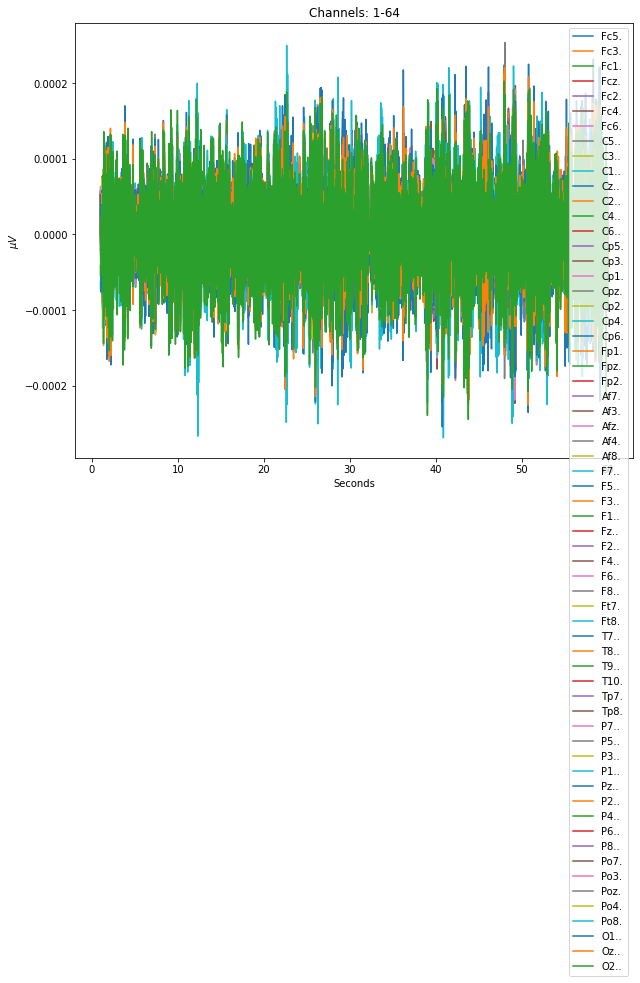

In [ ]:
sfreq = raw_obj.info['sfreq']
sfreq = raw_obj.info['sfreq']
raw_obj.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

data, times = raw_obj[:-1,int(sfreq * 1):int(sfreq * 60)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-64');
plt.legend(raw_obj.ch_names);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.600 (s)


<ipython-input-10-f2bb429d8f14>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_obj.plot_psd(tmax=np.inf, fmax = 40)


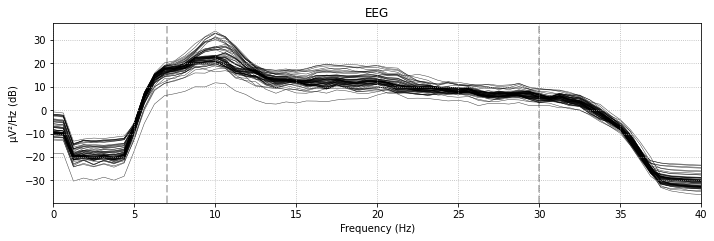

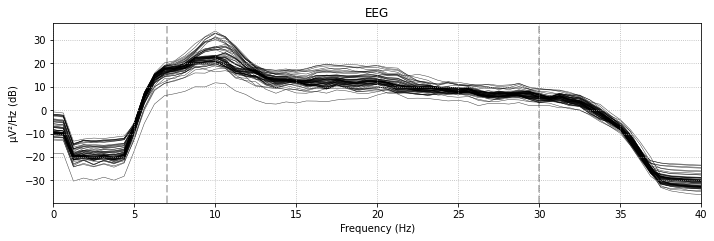

In [ ]:
raw_obj.plot_psd(tmax=np.inf, fmax = 40)

In [ ]:
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
event_ids

Used Annotations descriptions: ['T0']


{'T0': 1}

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'box', 'ids', 'kind', 'names', 'plot', 'pos', 'save']


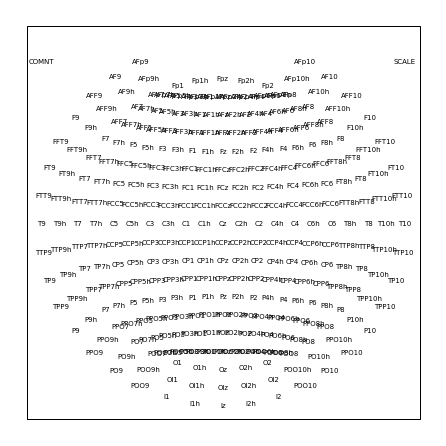

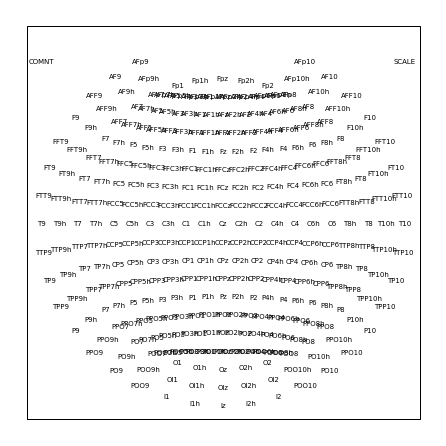

In [ ]:

layout = mne.channels.read_layout("EEG1005")
print(dir(layout))
layout.plot()

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


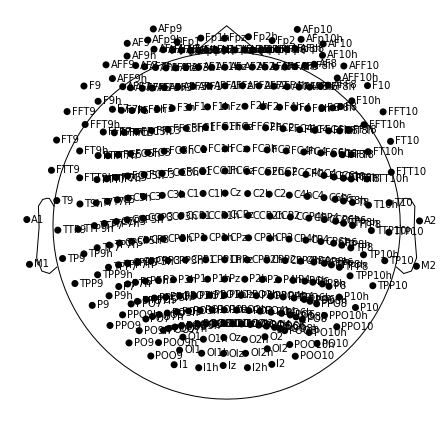

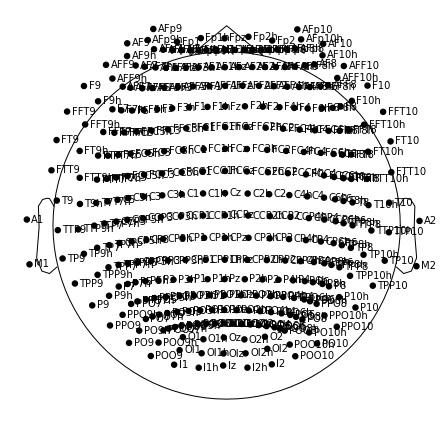

In [ ]:
montage_1 = mne.channels.make_standard_montage("standard_1005")

montage_1.plot()

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


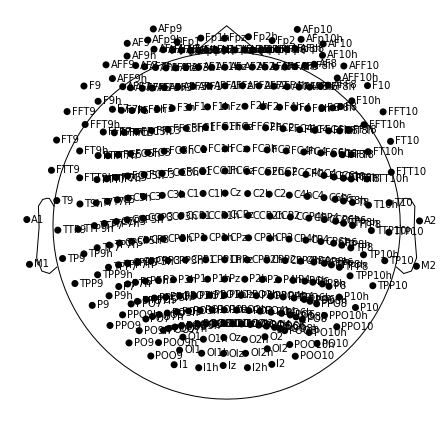

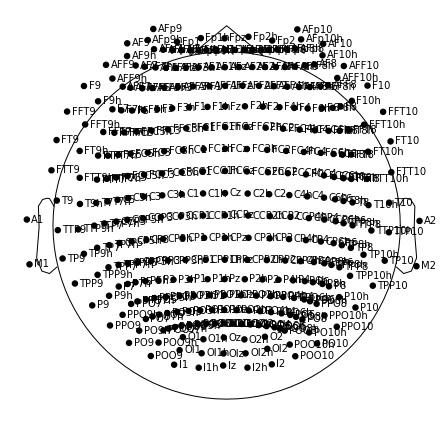

In [ ]:
montage_1 = mne.channels.make_standard_montage("standard_1005")

montage_1.plot()

In [ ]:
ch_names = raw_obj.ch_names
ch_names = [ x.replace(".","") for x in ch_names]
ch_names = [ x.upper() for x in ch_names]
print(ch_names)

['FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'FP1', 'FPZ', 'FP2', 'AF7', 'AF3', 'AFZ', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'IZ']


In [ ]:
montage_2 = [x.upper() for x in montage_1.ch_names]
x2 = [x.upper() for x in ch_names]
list(set(montage_2) - set(x2))
print(montage_2)

['FP1', 'FPZ', 'FP2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFZ', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POZ', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'OZ', 'O2', 'I1', 'IZ', 'I2', 'AFP9H', 'AFP7H', 'AFP5H', 'AFP3H', 'AFP1H', 'AFP2H', 'AFP4H', 'AFP6H', 'AFP8H', 'AFP10H', 'AFF9H', 'AFF7H', 'AFF5H', 'AFF3H', 'AFF1H', 'AFF2H', 'AFF4H', 'AFF6H', 'AFF8H', 'AFF10H', 'FFT9H', 'FFT7H', 'FFC5H', 'FFC3H', 'FFC1H', 'FFC2H', 'FFC4H', 'FFC6H', 'FFT8H', 'FFT10H', 'FTT9H', 'FTT7H', 'FCC5H', 'FCC3H', 'FCC1H', 'FCC2H', 'FCC4H', 'FCC6H', 'FTT8H', 'FTT10H', 'TTP9H', 'TTP7H', 'CCP5H', 'CCP3H', 'CCP1H', 'CCP2H', 'CCP4H', 'C

In [ ]:
kept_channels = ch_names

ind = [i for (i, channel) in enumerate(montage_2) if channel in kept_channels]
montage_new = montage_1.copy()

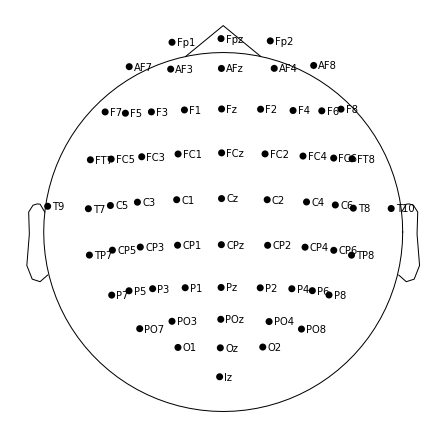

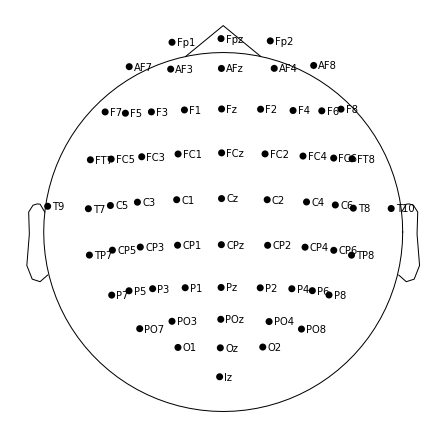

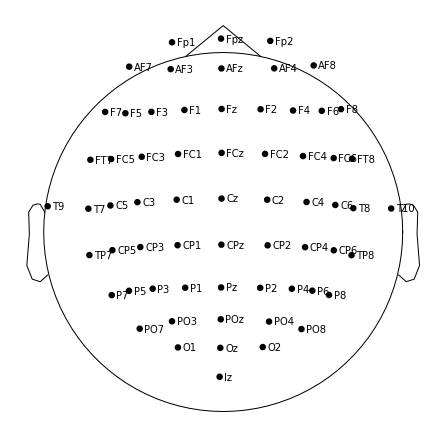

In [ ]:
montage_new.ch_names = [montage_1.ch_names[x] for x in ind]
kept_channel_info = [montage_1.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
montage_new.dig = montage_1.dig[0:3]+kept_channel_info
montage_new.plot()
montage_new.plot()

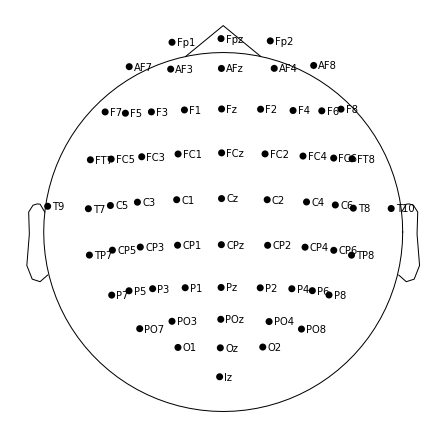

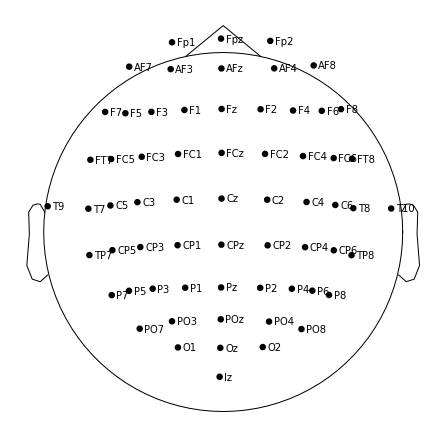

In [ ]:
montage_new.plot()

In [ ]:
montage_new.ch_names = [x.upper() for x in montage_new.ch_names]
montage_names = ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
montage_names_2 = [x.upper() for x in montage_names]
montage_names_2 = [x.replace(".","") for x in montage_names_2]

In [ ]:
list(set(montage_new.ch_names) - set(montage_names_2))
list(set(montage_names_2) - set(montage_new.ch_names))

[]

In [ ]:
montage_new_names = []
for x in montage_new.ch_names:
    for i, s in enumerate(montage_names_2):
        if x == s:
            montage_new_names.append(i)

In [ ]:
montage_new.ch_names = [(montage_names[x]) for x in montage_new_names]

In [ ]:
raw_obj = raw_obj.set_montage(montage_new, match_case=False, match_alias=False )

In [ ]:
updated_mont = raw_obj.get_montage()

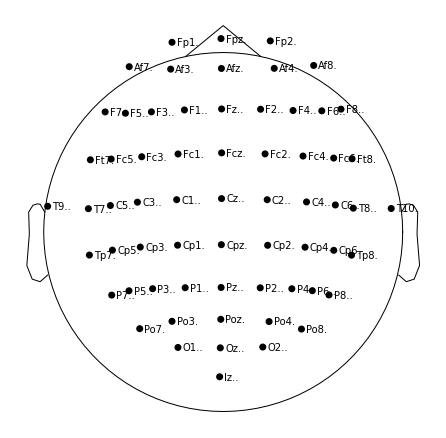

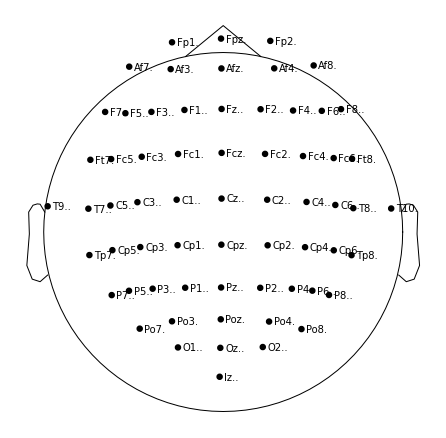

In [ ]:
updated_mont.plot()

In [ ]:
import pandas as pd

raw_data_df = pd.DataFrame()

for index in range(len(raw_data)):
    raw_data_df[index] = [float("{:f}".format(float(x)))*1000000 for x in raw_data[index]]

In [ ]:
# df.to_csv("data_frame.csv")

In [ ]:
for data_col in raw_data:
    a = list(data_col)[0]
   

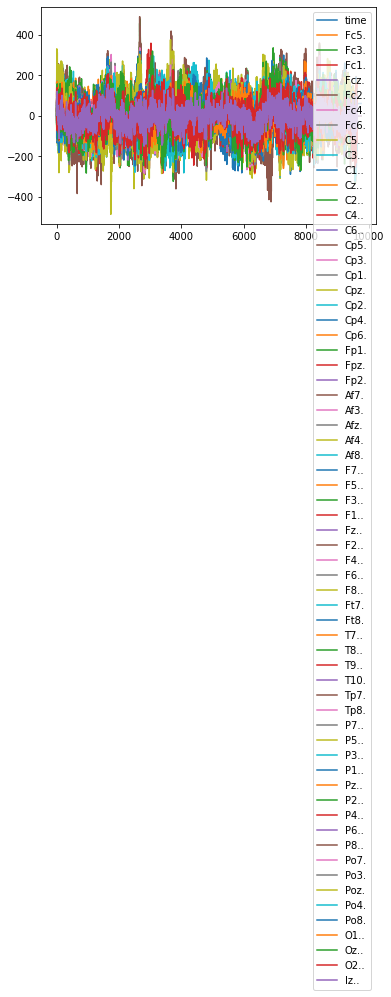

In [ ]:
raw_obj.to_data_frame().plot()

In [ ]:
channel_names = raw_obj.ch_names

In [ ]:
channel_categories = {"Fp":['Fp1.', 'Fpz.', 'Fp2.'],
                      "Af":['Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.'], 
                      "F":['F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..'], 
                      "Ft":['Ft7.', 'Ft8.'], 
                      "Fc":['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.'], 
                      "T":['T7..', 'T8..', 'T9..', 'T10.'], 
                      "C":['C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..'], 
                      "Tp":['Tp7.', 'Tp8.'], 
                      "Cp": ['Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.'], 
                      "P":['P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..'], 
                      "Po":['Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.'], 
                      "O":[ 'O1..', 'Oz..', 'O2..'], 
                      "I":['Iz..']
                     }

In [ ]:
import pandas as pd
df = raw_obj.to_data_frame()

In [ ]:
cat_avg = {"Fp":_,"Af":_,"F":_,"Ft":_,"Fc":_,"T":_,"C":_,"Tp":_,"Cp":_,"P":_,"Po":_,"O":_,"I":_}

In [ ]:
for channel_category in channel_categories:
    arr = channel_categories[channel_category]
    print("Arr:", len(arr))

Arr: 3
Arr: 5
Arr: 9
Arr: 2
Arr: 7
Arr: 4
Arr: 7
Arr: 2
Arr: 7
Arr: 9
Arr: 5
Arr: 3
Arr: 1


In [ ]:
cat_seq = ["Fc","C","Cp","Fp","Af","F","Ft","T","Tp","P","Po","O","I"]

grouped_raw = []